# Roller Coasters

## Project Goals: 
To create several kind of data visualization using matplotlib library and to dive into data analysis about given roller coasters data. 

In [510]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Import textwrap library for long text
from textwrap import wrap

## Understanding Data

Roller coasters data are split into two main categories based on their construction material: wood or steel. Rankings for the best wood and steel roller coasters from the 2013 to 2018 Golden Ticket Awards are provided in 'Golden_Ticket_Award_Winners_Wood.csv' and 'Golden_Ticket_Award_Winners_Steel.csv'
<br>
<br>
Both dataset have following columns:
* **Rank:** rank of the roller coaster in a given year
* **Name:** name of the roller coaster
* **Park:** amusement park where the roller coaster is located
* **Location:** location of the amusement park where the roller coaster is located
* **Supplier:** manufacturer of the roller coaster
* **Year Built:** year the roller coaster was built
* **Points:** points scored in a given year’s ranking
* **Year of Rank:** year the roller coaster achieved a given rank

### Wood Roller Coasters

In [511]:
# load wood coasters rankings data
wood_coasters_ranking = pd.read_csv("Golden_Ticket_Award_Winners_Wood.csv")

# have a look at the first five rows of data given
wood_coasters_ranking.head()


,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
0,1,Boulder Dash,Lake Compounce,"Bristol, Conn.",CCI,2000,1333,2013
1,2,El Toro,Six Flags Great Adventure,"Jackson, N.J.",Intamin,2006,1302,2013
2,3,Phoenix,Knoebels Amusement Resort,"Elysburg, Pa.",Dinn/PTC-Schmeck,1985,1088,2013
3,4,The Voyage,Holiday World,"Santa Claus, Ind.",Gravity Group,2006,1086,2013
4,5,Thunderhead,Dollywood,"Pigeon Forge, Tenn.",GCII,2004,923,2013


#### Examining more about numeric data in 'wood_coasters_ranking'
There are some findings as follows:
* Rank is between 1 - 50
* Coasters were built between 1914 - 2017
* Points / Scores are from 66 - 1625 
* The ranks were recorded between 2013 to 2018 (total 6 years) as expected but there are 180 rows of observations.

In [512]:
# Gain overall view  of numeric data with descriptive statistics
wood_coasters_ranking.describe()

,Rank,Year Built,Points,Year of Rank
count,180.000000,180.000000,180.000000,180.000000
mean,22.127778,1994.450000,392.388889,2016.500000
std,15.217246,24.309061,381.816130,1.388299
min,1.000000,1914.000000,66.000000,2013.000000
25%,8.000000,1994.000000,121.250000,2016.000000
50%,20.500000,2003.000000,213.500000,2017.000000
75%,35.250000,2009.000000,579.500000,2018.000000
max,50.000000,2017.000000,1625.000000,2018.000000


### Inspect more about dataset 
1. <i>Checking the number of <font color = 'red'>wood</font> coasters that were in the ranking</i>
    <br>There were totally 61 coasters in the wood coasters ranking
2. <i>Checking the number of obsevations in each year</i>
    <br>There were different number of recorded in each year

In [513]:
# Check the number of unique name of wood coasters
wood_coasters_ranking.Name.nunique()

61

In [514]:
# Check the number of observations in each 'Year of Rank'
wood_coasters_ranking.groupby(['Year of Rank']).Name.count().reset_index(name = 'counts')

,Year of Rank,counts
0,2013,10
1,2014,10
2,2015,10
3,2016,50
4,2017,50
5,2018,50


### Steel Roller Coasters

In [515]:
# load steel coasters rankings data
steel_coasters_ranking = pd.read_csv("Golden_Ticket_Award_Winners_Steel.csv")

# have a glance at the first five rows of data given
steel_coasters_ranking.head()

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
0,1,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1204,2013
1,2,Bizarro,Six Flags New England,"Agawam, Mass.",Intamin,2000,1011,2013
2,3,Expedition GeForce,Holiday Park,"Hassloch, Germany",Intamin,2001,598,2013
3,4,Nitro,Six Flags Great Adventure,"Jackson, N.J.",B&M,2001,596,2013
4,5,Apollo’s Chariot,Busch Gardens Williamsburg,"Williamsburg, Va.",B&M,1999,542,2013


### Examining more about numeric data in 'steel_coasters_ranking'

There are some findings as follows:
* Rank is between 1 - 50
* Coasters were built between 1976 - 2018
* Points / Scores are from 59 - 1354
* The ranks were recorded between 2013 to 2018 (total 6 years) as expected but there are 180 rows of observations.

In [516]:
# Gain overall view  of numeric data with descriptive statistics
steel_coasters_ranking.describe()

,Rank,Year Built,Points,Year of Rank
count,180.000000,180.000000,180.000000,180.000000
mean,22.127778,2004.655556,325.433333,2016.500000
std,15.186377,9.511723,279.650322,1.388299
min,1.000000,1976.000000,59.000000,2013.000000
25%,8.000000,2000.000000,112.250000,2016.000000
50%,20.500000,2006.000000,246.000000,2017.000000
75%,35.250000,2012.000000,427.000000,2018.000000
max,50.000000,2018.000000,1354.000000,2018.000000


### Inspect more about dataset 
1. <i>Checking the number of <font color = 'red'>steel</font> coasters that were in the ranking</i>
    <br>There were totally 63 coasters in the steel coasters ranking
2. <i>Checking the number of obsevations in each year</i>
    <br>There were different number of recorded in each year

In [517]:
# Check the number of unique name of wood coasters
steel_coasters_ranking.Name.nunique()

63

In [518]:
# Check the number of observations in each 'Year of Rank'
steel_coasters_ranking.groupby(['Year of Rank']).Name.count().reset_index(name='counts')

,Year of Rank,counts
0,2013,10
1,2014,10
2,2015,10
3,2016,50
4,2017,50
5,2018,50


## Create a function to plot rankings over time for 1 roller coaster

Inspecting more in the dataset, it was found out that there were coasters which have the same name but located in different parks. Therefore, this function has to have park's name as an argument as well. Regarding ranking which the less number is better, the y-axis of the plot was set from 50 - 0 (the maximum to the minimum of ranks)

In [519]:
# ranking_over_time function
def ranking_over_time(coaster, park, df):
    '''
    Parameters: 
        coaster (str): a coaster's name
        park (str): a coaster's park name
        df (dataframe): a dataset (wood or steel coasters ranking)
    Returns:
        A line plot of rankings over time of a coaster
    '''
    coaster_data = df[(wood_coasters_ranking.Name == coaster) & (wood_coasters_ranking.Park == park)]
    year = coaster_data['Year of Rank']
    rank = coaster_data['Rank']
    plt.clf()
    plt.figure(figsize=(8,6))
    
    # plot the line
    plt.plot(year, rank, color='gold', marker='o')
    
    # provide informative labels for the visualization
    plt.title('\n'.join(wrap('Rank of ' + coaster + ', ' + park+ ' over Time', 45)), fontsize='xx-large')
    plt.gca().invert_yaxis()
    plt.xlabel('Year', fontsize='x-large')
    plt.ylabel('Ranking', fontsize='x-large')
    plt.show()
    

### Using "ranking_over_time" function to plot the ranking
The coaster "El Toro" at "Six Flags Great Adventure" park was chosen as an example.

<Figure size 432x288 with 0 Axes>

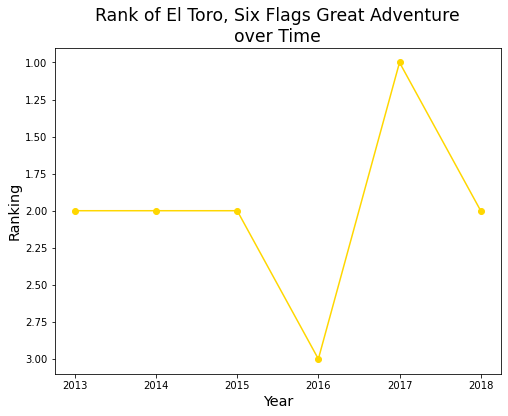

In [520]:
# plot the rankings of "El Toro" at "Six Flags Great Adventure" park
ranking_over_time("El Toro", "Six Flags Great Adventure", wood_coasters_ranking)

## Create a function to plot rankings over time for 2 roller coasters
This function is to compare the ranking overtime of 2 roller coasters. It is quite similar to the previous one but include information of another coaster.

In [521]:
# compare_ranking_over_time function
def compare_ranking_over_time(coaster1, park1, coaster2, park2, df):
    '''
    Parameters: 
        coaster1 (str): the first coaster's name
        park1 (str): the first coaster's park name
        coaster2 (str): the second coaster's name
        park2 (str): the second coaster's park name
        df (dataframe): a dataset (wood or steel coasters ranking)
    Returns:
        Two lines plot of rankings over time of two given coasters
    '''    
    first_coaster = df[(df.Name == coaster1) & (df.Park == park1)]
    second_coaster = df[(df.Name == coaster2) & (df.Park == park2)]
    
    plt.clf
    plt.figure(figsize=(8,6))
    # plot the lines
    plt.plot(first_coaster['Year of Rank'], first_coaster['Rank'], label = coaster1, marker = 'o')
    plt.plot(second_coaster['Year of Rank'], second_coaster['Rank'], label = coaster2, marker = 'D')
    
    # provide informative labels for the visualization
    plt.legend([coaster1+', '+park1, coaster2+', '+park2])
    plt.gca().invert_yaxis()
    plt.title('\n'.join(wrap('Rank of '+coaster1+' VS '+coaster2+' over Time', 45)), fontsize='xx-large')
    plt.xlabel('Year', fontsize='x-large')
    plt.ylabel('Ranking', fontsize='x-large')
    plt.show()

### Using "compare_ranking_over_time" function to plot the rankings
In this example, the two <font color = 'red'>steel</font> coasters were selected
* "Millennium Force" at "Cedar Point" 
* "Expedition GeForce" at "Holiday Park"

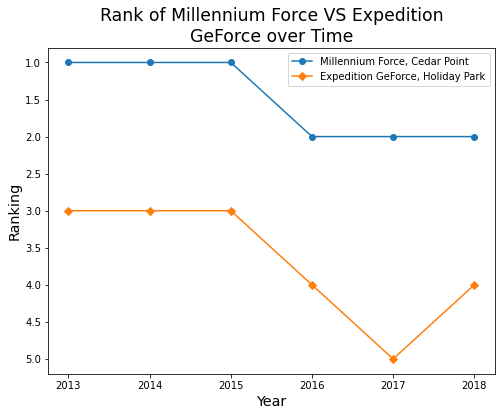

In [522]:
# plot the rankings between 2 steel coasters
compare_ranking_over_time("Millennium Force", "Cedar Point", "Expedition GeForce", "Holiday Park", steel_coasters_ranking)

## Create a function to plot top n rankings over time


In [523]:
# top_n_rankings function
def top_n_rankings(n, df):
    '''
    Parameters: 
        n (int): the number of top "n" ranking 
        df (dataframe): a dataset (wood or steel coasters ranking)
    Returns:
        the lines of coasters in the first "n" ranking over time
    '''    
    # select coasters that the rank is less or equal to 'n'
    data = df[(df.Rank <= n)]
    
    # get the unique names of the coasters in data
    n_rank_coasters = data.Name.unique()
    
    # create a figure 
    plt.clf()
    plt.figure(figsize=(8,6))
    
    # create a plot for each coaster
    for coaster in n_rank_coasters:
        coaster_data = data[(data.Name == coaster)]
        plt.plot(coaster_data['Year of Rank'], coaster_data['Rank'], label = coaster, marker = 'o')
        
    # provide informative labels of the visualization
    plt.title("Top " + str(n) + " Roller Coasters over Time", fontsize='xx-large')
    plt.yticks(range(n+1))
    plt.ylim(n+1,0)
    plt.ylabel("Ranking", fontsize='x-large')
    plt.xlabel("Year", fontsize='x-large')
    plt.legend(title="Coasters' Names", bbox_to_anchor=(1, 1), loc = 'upper left')
    plt.show()

### Top 5 Wood Roller Coasters over Time
By ploting top 5 rankings of wood roller coasters between 2013 - 2018, it was found out that *Boulder Dash* 's rankings declined in 2017 until its ranks fall from top 3 in 2018. In contrast, *Phoenix* has gotten better ranks and become an important competitor with *El Toro*  and *Voyage*.

<Figure size 432x288 with 0 Axes>

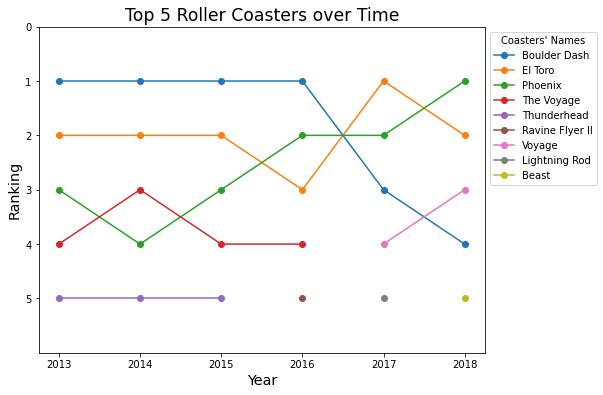

In [524]:
# Create a plot of top n rankings wood roller coasters over time
top_n_rankings(5, wood_coasters_ranking)

### Top 5 Steel Roller Coasters Over Time
As seen below in the top 5 rankings of steel roller coasters during 2013 - 2018, *Millennium Force* ,  *Fury 325*  and *Superman The Ride* were ones of the front runners of the last 3 years (2016-2018). Moreover, there might be a dark horse - *Steel Vengeance* which was the second runner-up in 2018. Since it was completely constructed 2018 as well, it might be one of the front runners in years later.

<Figure size 432x288 with 0 Axes>

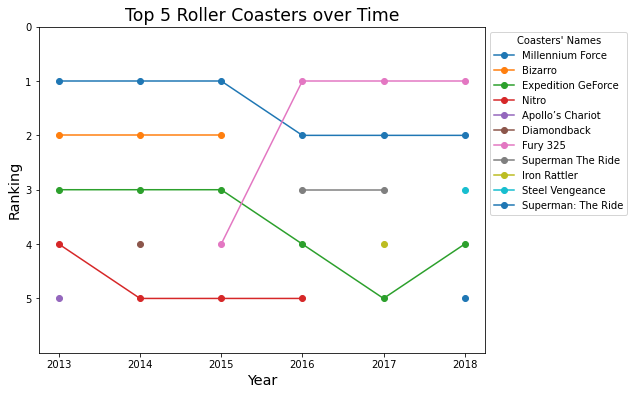

In [525]:
# Create a plot of top n rankings steel roller coasters over time
top_n_rankings(5, steel_coasters_ranking)

In [526]:
# Check more about "Steel Vengenance" Roller Coaster
steel_coasters_ranking[steel_coasters_ranking.Name == 'Steel Vengeance']

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
132,3,Steel Vengeance,Cedar Point,"Sandusky, Ohio",Rocky Mountain,2018,829,2018


## Visualizing roller coasters data
Given data from Captain Coaster, "roller_coasters.csv" provided more data of each coaster. The followings are the columns' name and their meaning.
* **name:** name of the roller coaster
* **material_type:** the material used to build the roller coaster
* **seating_type:** the type of seating used on the roller coaster
* **speed:** maximum speed of the roller coaster, in kilometers/hour
* **height:** maximum height of the roller coaster, in meters
* **length:** length of the roller coaster, in meters
* **num_inversions:** total number of inversions on the roller coaster
* **manufacturer:** manufacturer of the roller coaster
* **park:** amusement park where the roller coaster is located
* **status:** operating status of the roller coaste

In [527]:
# load roller coaster data
roller_coasters = pd.read_csv("roller_coasters.csv")
# see the first five rows of dataframe
roller_coasters.head()

,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status
0,Goudurix,Steel,Sit Down,75.0,37.0,950.0,7.0,Vekoma,Parc Asterix,status.operating
1,Dream catcher,Steel,Suspended,45.0,25.0,600.0,0.0,Vekoma,Bobbejaanland,status.operating
2,Alucinakis,Steel,Sit Down,30.0,8.0,250.0,0.0,Zamperla,Terra Mítica,status.operating
3,Anaconda,Wooden,Sit Down,85.0,35.0,1200.0,0.0,William J. Cobb,Walygator Parc,status.operating
4,Azteka,Steel,Sit Down,55.0,17.0,500.0,0.0,Soquet,Le Pal,status.operating


In [528]:
# Check total number of rows and columns
roller_coasters.shape

(2802, 10)

In [529]:
# Gain overall view  of numeric data with descriptive statistics
roller_coasters.describe()

,speed,height,length,num_inversions
count,1478.000000,1667.000000,1675.000000,2405.000000
mean,70.102842,26.725855,606.147463,0.809563
std,28.338394,35.010166,393.840496,1.652254
min,0.000000,0.000000,-1.000000,0.000000
25%,47.000000,13.000000,335.000000,0.000000
50%,72.000000,23.000000,500.000000,0.000000
75%,88.000000,35.000000,839.000000,1.000000
max,240.000000,902.000000,2920.000000,14.000000


In [530]:
# check total number of null value in each columns
roller_coasters.isnull().sum()

name                 3
material_type        0
seating_type         0
speed             1324
height            1135
length            1127
num_inversions     397
manufacturer         0
park                 0
status               0
dtype: int64

### Cleaning Data
After looking at the descriptive statistics of numeric columns in the dataset, it is clear that there are a lot of missing values. To see more, there are 5 columns that had missing values: name, speed, height, length and num_inversions. Thus, the rows containing null values were all removed. 
<br>
<br>
However, after inspecting the dataset again by descriptive statistics. There are columns which should not have the minimum values equal to zero such as *speed, height, and length*. Most of those roller coasters are under construction (status = 'status.contruction') or announced (status = 'status.announced'). For this reason, the rows that contain minimum value of speed, height, or length equal to 0 will be deleted also.



In [531]:
# delete the rows that contain null values
roller_coasters = roller_coasters.dropna()
# check descriptive statistics of dataset again
roller_coasters.describe()

,speed,height,length,num_inversions
count,1279.000000,1279.000000,1279.000000,1279.000000
mean,71.574668,28.935106,641.050039,1.265833
std,28.124453,38.562609,396.610955,1.973537
min,0.000000,0.000000,0.000000,0.000000
25%,50.000000,15.000000,354.500000,0.000000
50%,75.000000,25.000000,566.000000,0.000000
75%,89.000000,36.000000,877.000000,2.000000
max,240.000000,902.000000,2479.000000,14.000000


In [532]:
# select only rows which have non-zero spped, height, and length
roller_coasters_cleaned = roller_coasters.loc[(roller_coasters.speed != 0) & (roller_coasters.height != 0) & (roller_coasters.length != 0)]
roller_coasters_cleaned.describe()

,speed,height,length,num_inversions
count,1265.000000,1265.000000,1265.000000,1265.000000
mean,72.331225,29.180237,646.832411,1.275889
std,27.311642,38.667040,394.309479,1.977467
min,7.000000,2.000000,25.000000,0.000000
25%,50.000000,15.000000,360.000000,0.000000
50%,75.000000,25.000000,581.000000,0.000000
75%,89.000000,36.000000,881.000000,2.000000
max,240.000000,902.000000,2479.000000,14.000000


## Create a function to plot histogram of column values
As there are some rows that has lots of null values, so the dataset should be cleaned by removing all the null values.

In [533]:
# Create a function to plot histogram of column values
def plot_hist(df, column_name):
    '''
    Parameters:
        df (dataframe): dataset of roller coasters
        column_name (str): a column name which is an attribuite of roller coasters and its type is numeric
    Return:
        A histogram plot of the attribute's distribution
    '''
    data = df[column_name]

    plt.clf()
    plt.figure(figsize=(8,6))
    plt.hist(data, bins=20)
    plt.title("Coasters' " + column_name.title() + " Distribution")
    plt.show()

<Figure size 432x288 with 0 Axes>

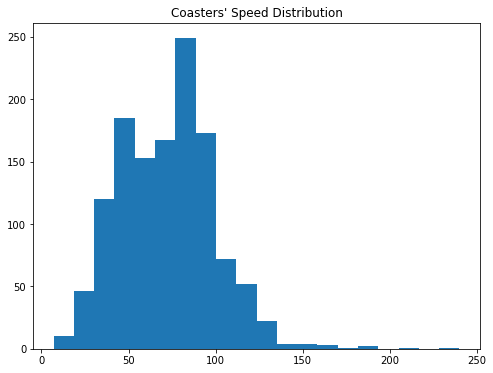

<Figure size 432x288 with 0 Axes>

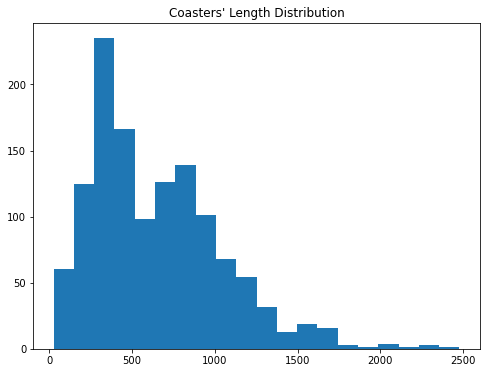

<Figure size 432x288 with 0 Axes>

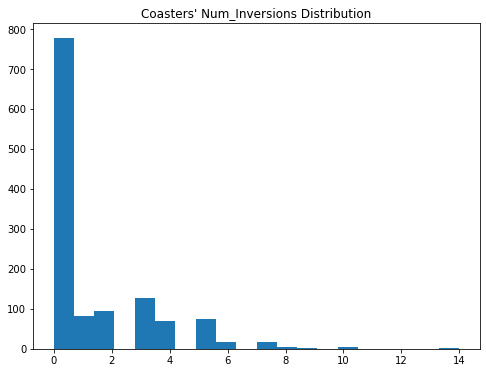

<Figure size 432x288 with 0 Axes>

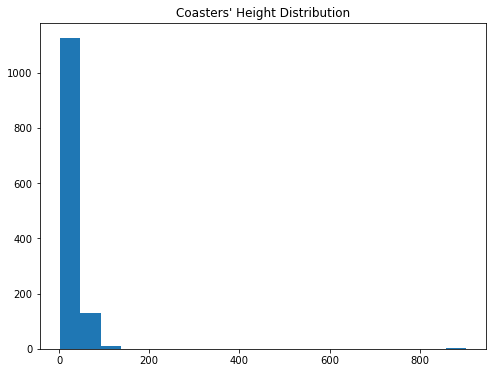

In [534]:
# Create histogram of roller coaster speed
plot_hist(roller_coasters_cleaned, 'speed')
# Create histogram of roller coaster length
plot_hist(roller_coasters_cleaned, 'length')
# Create histogram of roller coaster number of inversions
plot_hist(roller_coasters_cleaned, 'num_inversions')
# Create a function to plot histogram of height values
plot_hist(roller_coasters_cleaned, 'height')

### Outliers in the dataset
Since there were outliers in the coasters' height (the maximum height is 902), the histogram of coasters' height is too much skewed. Therefore, the histogram of coasters' height was plotted seperately by removing that outliner.

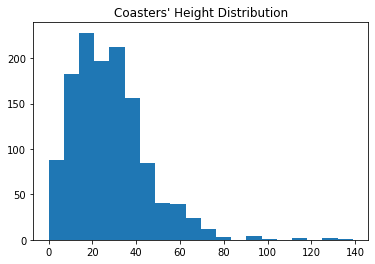

In [535]:
plt.clf()
heights = roller_coasters[roller_coasters['height'] <= 150]
plt.hist(heights.height, bins=20)
plt.title("Coasters' Height Distribution")
plt.show()

## Create a function to plot num_inversions of each coaster at a park

In [536]:
def park_coasters_inversions(df, park_name):
    """
    Parameters:
        df (dataframe): roller coasters dataset
        park_name (str): interested park's name
    Return:
        A bar graph that shows the number of inversions of each coaster in a park given
    """
    # get coasters' data of the park given
    park_coasters = df[df.park == park_name]
    
    # sort the data by the number of inversions 
    park_coasters = park_coasters.sort_values('num_inversions', ascending=False)
    
    name = park_coasters['name']
    num_inversions = park_coasters['num_inversions']
    x_ticks = range(len(name))
    
    plt.clf()
    plt.figure(figsize=(8,6))
    
    # plot a bar chart
    ax = plt.subplot()
    ax.bar(name, num_inversions, width = 0.5, align = 'center')
    
    # provide informative labels for the visualization
    ax.set_title('\n'.join(wrap("Coasters' Number of Inversions at " + park_name + " Park", 45)), fontsize='xx-large')
    ax.set_ylabel("Number of Inversions")
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(name, rotation = 90)
    plt.show()

<Figure size 432x288 with 0 Axes>

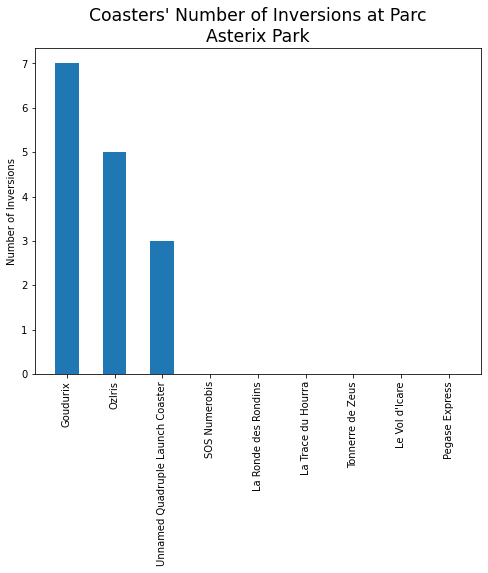

In [537]:
# Create barplot of inversions by roller coasters
park_coasters_inversions(roller_coasters_cleaned, 'Parc Asterix')

## Create a function to plot a pie chart of status.operating
This function is to visualize the percentage of coasters that still work compared with definitely closed coasters.

In [538]:
# Check all unique status in the dataset
roller_coasters_cleaned.groupby(['status']).name.count().reset_index(name="counts")

,status,counts
0,status.announced,10
1,status.closed.definitely,168
2,status.closed.temporarily,8
3,status.construction,13
4,status.operating,1031
5,status.relocated,15
6,status.retracked,16
7,status.unknown,4


In [539]:
# coaster_status function
def coaster_status(df):
    """
    Input: the dataframe of roller coasters data
    Return: a pie chart showing the percentage of operating vs definitely closed coasters
    """
    status = df.groupby(['status']).name.count().reset_index(name="counts")
    operating_vs_closed = status[(status['status'] == 'status.operating') | (status['status'] == 'status.closed.definitely')]
    
    colors = ['salmon', 'slateblue']

    plt.clf()
    plt.figure(figsize=(8,6))
    
    # plot a pie chart
    ax = plt.subplot()
    ax.pie(operating_vs_closed['counts'].values, autopct= '%.1f%%', startangle=90, colors=colors)
    
    # provide informative label for the visualization
    ax.legend(['Closed', 'Operating'])
    ax.axis('equal')
    ax.set_title("Coasters' Status")
    plt.show()


<Figure size 432x288 with 0 Axes>

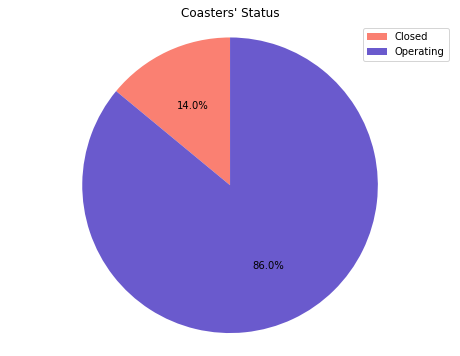

In [540]:
# Create pie chart of roller coasters' status
coaster_status(roller_coasters_cleaned)

## Create a function to plot scatter of two numeric variables
Scatter plots help examine relationship between two variables. As seen before, roller coasters dataset has 4 numeric variables: speed, height, length, and num_inversions. However, when ploting a histogram it was obvious that outliers affect the distribution of coasters' height. Therefore, the outliers should be removed from the dataset before doing scatter plots.


In [541]:
# remove the outliers of dataset
roller_coasters_cleaned = roller_coasters_cleaned.loc[roller_coasters_cleaned.height != 902]

# check the size of dataset
roller_coasters_cleaned.shape

(1263, 10)

In [542]:
# get all the numeric columns from a dataframe
numeric_features = roller_coasters_cleaned.select_dtypes(include=[np.number])
numeric_features.head()

,speed,height,length,num_inversions
0,75.0,37.0,950.0,7.0
1,45.0,25.0,600.0,0.0
2,30.0,8.0,250.0,0.0
3,85.0,35.0,1200.0,0.0
4,55.0,17.0,500.0,0.0


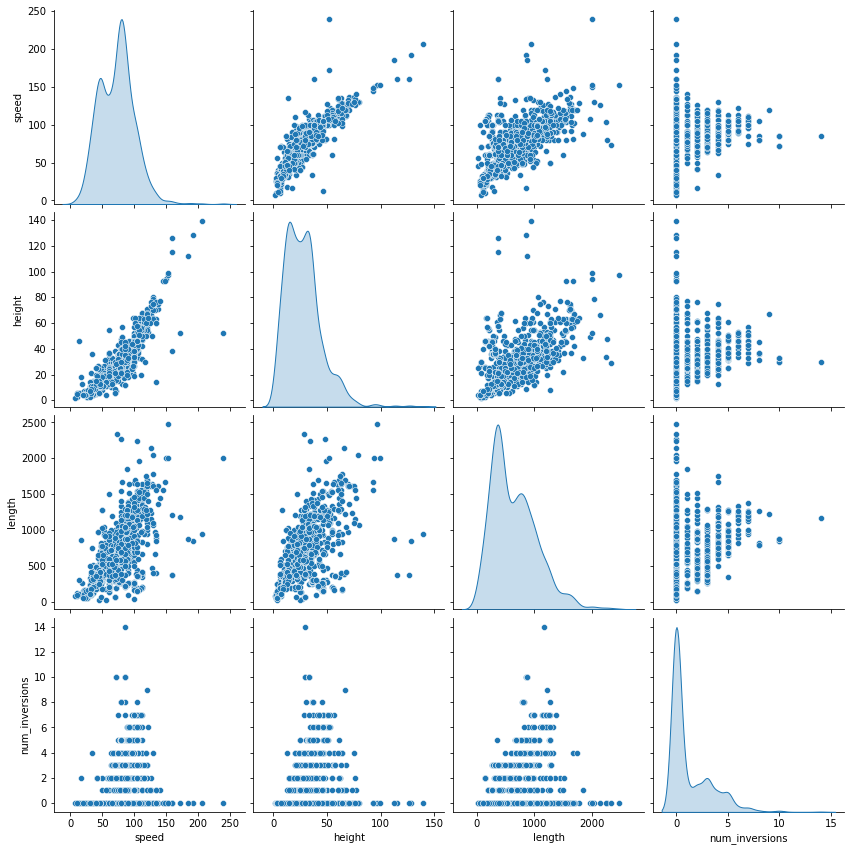

In [543]:
# To plot scatter plots by pairing a couple of features
sns.pairplot(numeric_features, height = 3 ,kind ='scatter',diag_kind='kde')
plt.show()

There is correlation between speed and height and their relationship is linear.

## Popular Seating Types and their relationship with Height, Speed, and Length
To know what is the most popular seating types of roller coasters, the bar chart of number of coasters regarding their seating types was created. Then, the relationship between each seating type and other numeric variables such as height were visualized by boxplots.

In [544]:
# Check the unique roller coasters' seating types
roller_coasters_cleaned.seating_type.unique()

array(['Sit Down', 'Suspended', 'Inverted', 'Spinning', 'Water Coaster',
       'Floorless', 'Bobsleigh', 'Stand Up', 'Flying', '4th Dimension',
       'Pipeline', 'Wing', 'Motorbike', 'Alpine'], dtype=object)

<Figure size 432x288 with 0 Axes>

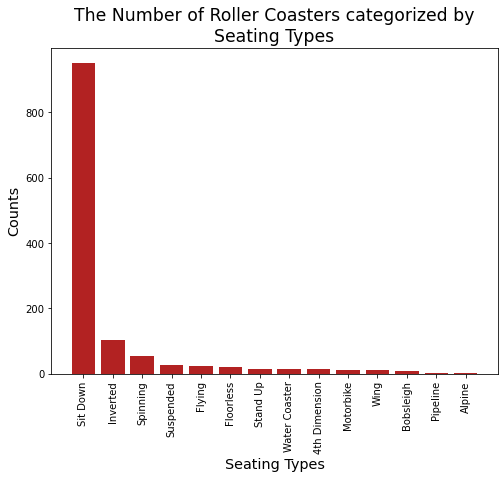

In [545]:
# count the number of coasters of each seating type
seating_types = roller_coasters_cleaned.groupby(['seating_type']).name.count().reset_index(name='counts')


# sort the seating types with the most counts first
seating_types = seating_types.sort_values('counts', ascending=False)

# create a figure
plt.clf()
plt.figure(figsize=(8,6))

# create a bar chart
x = range(len(seating_types.seating_type.values))
ax = plt.subplot()
ax.bar(seating_types.seating_type, seating_types.counts, color='firebrick')
ax.set_xticks(x)
ax.set_xticklabels(seating_types.seating_type, rotation = 90)
ax.set_xlabel("Seating Types", fontsize='x-large')
ax.set_ylabel("Counts", fontsize='x-large')
ax.set_title("\n".join(wrap("The Number of Roller Coasters categorized by Seating Types", 45)), fontsize='xx-large')
plt.show()

The most common seating types was 'Sit Down'. The second and the third common seating types were 'Inverted' and 'Spinning' in turn.

In [546]:
#boxplots_by_seating_types function
def boxplots_by_seating_types(df, numeric_column_name):
    # create a new figure
    plt.figure(figsize=(12,9))

    # create boxplots of height categorized by seating types
    ax = sns.boxplot(x='seating_type', y = numeric_column_name,  data=df, palette="pastel")
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    ax.set_title("Boxplots of "+ numeric_column_name.title() + " Categorized by Seating Types", fontsize='xx-large')
    ax.set_xlabel("Seating Types", fontsize='x-large')
    ax.set_ylabel(numeric_column_name.title(), fontsize='x-large')


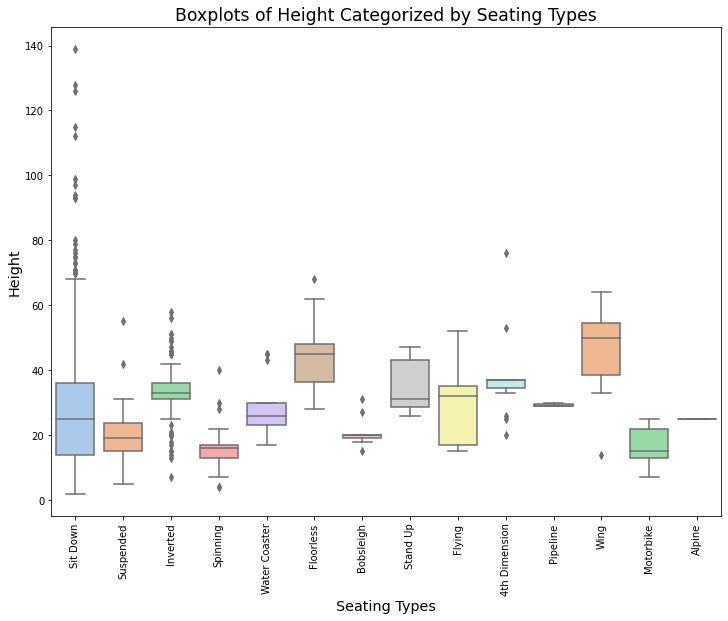

In [547]:
boxplots_by_seating_types(roller_coasters_cleaned, 'height')

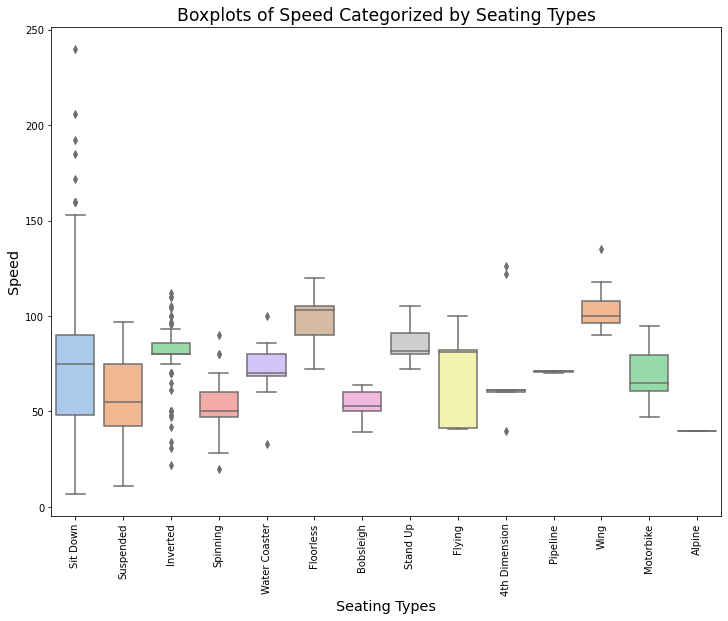

In [548]:
boxplots_by_seating_types(roller_coasters_cleaned, 'speed')

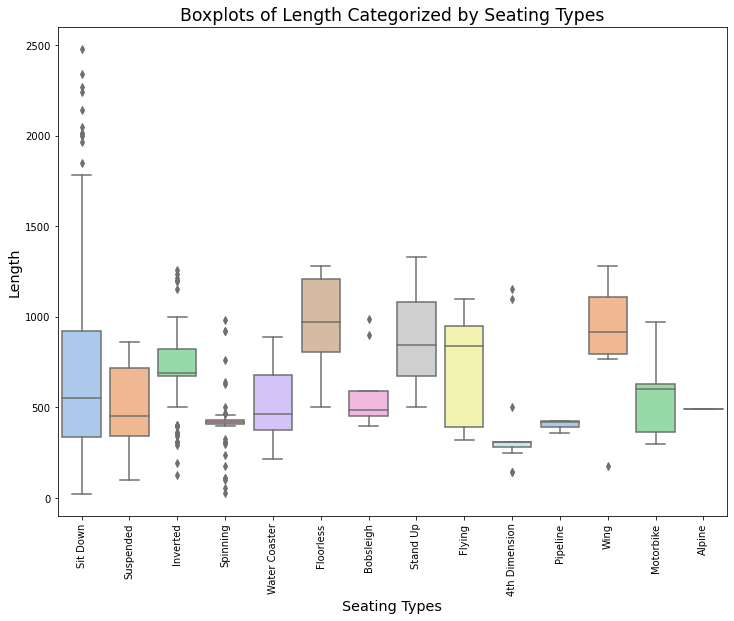

In [549]:
boxplots_by_seating_types(roller_coasters_cleaned, 'length')

By boxploting the seating types with other numeric values, the roller coasters that had 'Sit Down' seating type had wide ranges of height, speed, and length. While 'Suspended', 'Spinning', and 'Motorbike' seating-typed coasters are quite short in height at around 20 metres, most 'Floorless' and 'Wing' seating-typed roller coasters are high at about 40-55 metres. 'Floorless' and 'Wing' coasters were also good at speed (100 kms/hr). In aspect of length, 'Spinning' , '4th Dimension', and 'Pipeline' coasters are short in length. These are reasonable because their shape or technique to make players scream are different from the others.

## Manufacturer's specialties
Two functions were created. The *manufacturer_speed_height* function is to plot scatter of (speed, height) coordinates for a specified manufacturer. The *manufacturer_seat_inversions* function is to plot bar charts of number of coasters categorized by seating types and number of inversions for a specified manufacturer. 

In [550]:
# Check the number of unique manufacturers
roller_coasters_cleaned.manufacturer.nunique()

73

In [551]:
# Sort the number of roller coasters constructed by each manufacturer
manufacturer_coasters = roller_coasters_cleaned.groupby('manufacturer').name.count().reset_index(name='counts').sort_values('counts', ascending=False)
# Top 5 manufacturers
manufacturer_coasters.head()

,manufacturer,counts
67,Vekoma,217
32,Intamin,112
4,B&M,107
71,Zierer,88
39,Mack,81


In [552]:
# manufacturer_speed_height function
def manufacturer_speed_height(df, manufacturer_name):
    """
    Parameters:
        df (dataframe): roller coasters dataset
        manufacturer_name (str): an interested manufacturer's name
    Return: a scatter plot of speed and height of each coaster constructed by a given manufacturer
    """
    manufacturer = df[df.manufacturer == manufacturer_name]
    speed = manufacturer.speed.values
    height = manufacturer.height.values
    
    # create a figure
    plt.clf()
    plt.figure(figsize=(8,6))
    
    # plot a scatter plot
    plt.scatter(speed, height, alpha=0.5)
    
    # provide informative labels for the visualization
    plt.xlabel("Speed")
    plt.ylabel("Height")
    plt.title("Roller Coasters Manufactured by " + manufacturer_name)
    
    plt.show() 

<Figure size 432x288 with 0 Axes>

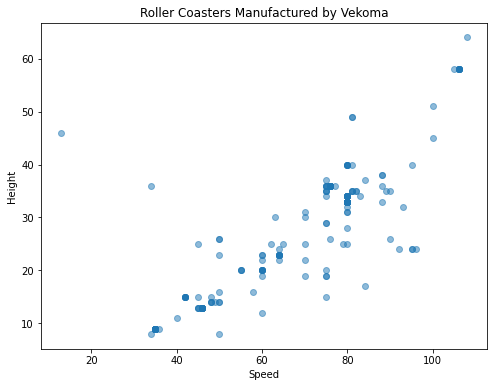

In [553]:
# run the function to inspect speed and height of roller coasters manufactured by 'Vekoma'
manufacturer_speed_height(roller_coasters_cleaned, 'Vekoma')

Vekoma has manufactured a lot of roller coasters (217 roller coasters). However, the company usually constructs roller coasters up to just over 60 metres high and around 110 kms/hr speed.

<Figure size 432x288 with 0 Axes>

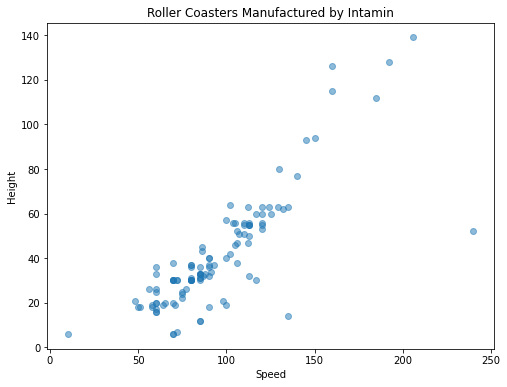

<Figure size 432x288 with 0 Axes>

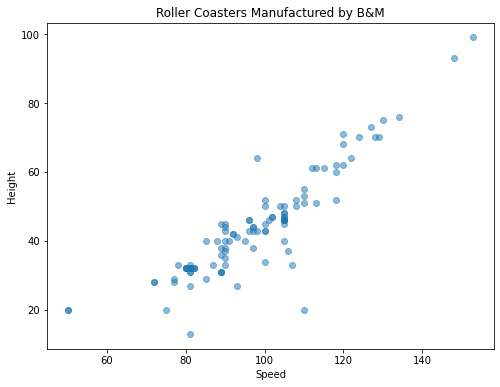

<Figure size 432x288 with 0 Axes>

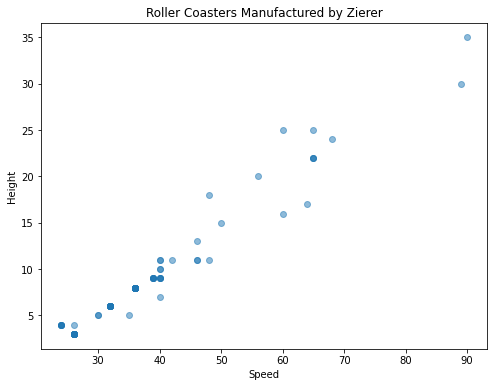

In [554]:
# To see other manufacterers' speed and height

manufacturer_speed_height(roller_coasters_cleaned, 'Intamin')
manufacturer_speed_height(roller_coasters_cleaned, 'B&M')
manufacturer_speed_height(roller_coasters_cleaned, 'Zierer')

* 112 **Intamin**'s coasters are in range of (140 metres high, 240 kms/hr speed).
* 107 **B&M**'s coasters are in range of (100 metres high, 160 kms/hr speed).
* 88 **Zierer**'s coasters are in range of (35 metres high, 90 kms/hr speed).

In [555]:
# manufacturer_seat_inversions
def manufacturer_seat_inversions(df, manufacturer_name):
    """
    Parameters:
        df (dataframe): roller coasters dataset
        manufacturer_name (str): an interested manufacturer's name
    Return: two bar charts of roller coasters constructed by a given manufacturer categorized by seating types and number of inversions
    """
    manufacturer = df[df.manufacturer == manufacturer_name]
    
    # filtered by seating_type dataset
    seating_types = manufacturer.groupby('seating_type').name.count().reset_index(name = 'counts')
    
    # filtered by num_inversions dataset
    num_inversions = manufacturer.groupby('num_inversions').name.count().reset_index(name = 'counts')
    
    # create a figure
    plt.clf()
    plt.figure(figsize=(8,6))
   
    # plot a bar chart of the manufacturer's coasters categorized by seating types
    ax = plt.subplot(121)
    x = range(len(seating_types.seating_type.values))
    ax.bar(x, seating_types['counts'], color = 'sandybrown')
    ax.set_xlabel('Seating Types')
    ax.set_ylabel('Counts')
    ax.set_xticks(x)
    ax.set_xticklabels(seating_types['seating_type'], rotation = 30)
    
    # plot a bar chart of the manufacturer's coasters categorized by number of inversions
    ax2 = plt.subplot(122)
    x1 = range(len(num_inversions.num_inversions.values))
    ax2.bar(x1, num_inversions['counts'], color = 'cadetblue')
    ax2.set_xlabel("number of inversions")
    ax2.set_ylabel("Counts")
    ax2.set_xticks(x1)
    ax2.set_xticklabels(num_inversions['num_inversions'], rotation = 30)
    
    plt.suptitle('Manufacturer: '+ manufacturer_name)
    
    plt.show()

<Figure size 432x288 with 0 Axes>

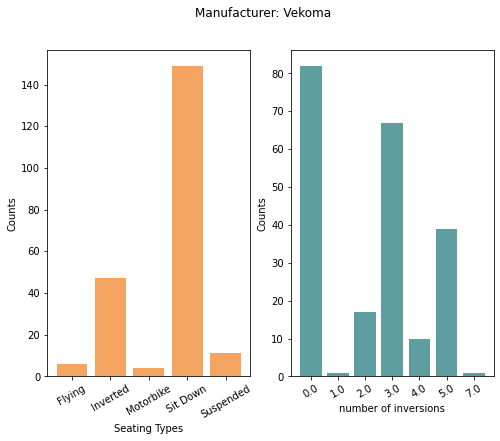

In [556]:
# run the function to inspect categorical data of roller coasters manufactured by 'Vekoma'
manufacturer_seat_inversions(roller_coasters_cleaned, 'Vekoma')

<Figure size 432x288 with 0 Axes>

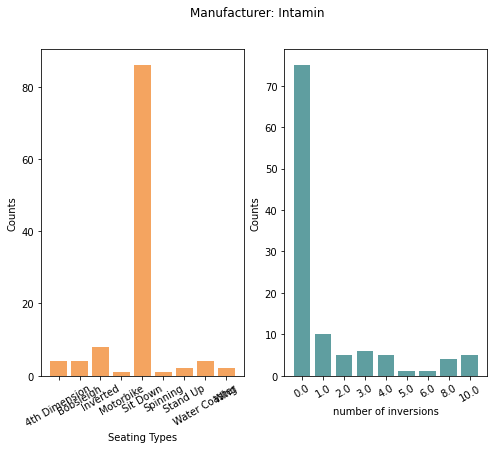

<Figure size 432x288 with 0 Axes>

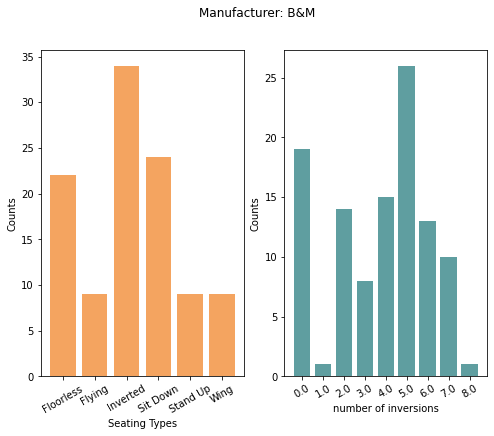

<Figure size 432x288 with 0 Axes>

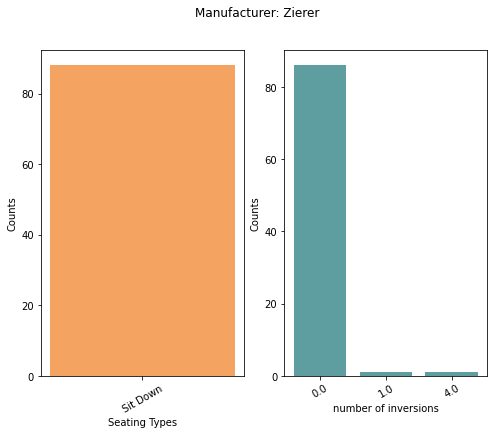

In [557]:
# To see other manufacterers' seating types and number of inversions

manufacturer_seat_inversions(roller_coasters_cleaned, 'Intamin')
manufacturer_seat_inversions(roller_coasters_cleaned, 'B&M')
manufacturer_seat_inversions(roller_coasters_cleaned, 'Zierer')

* **Vekoma** - Most of seating types were 'Sit Down' and 'Inverted' respectively. The company usually construct roller coasters with have 0, 3, 5 inversions, respectively
* **Intamin** - Most of seating types were 'Sit Down'. However, they had speciaties in various numbers of inversion from 0 -10 but the majorities have no inversion.
* **B&M** - The company are different from the previous one. Their specialties were Inverted, Sit Down and Floorless seating types. Moreover, they focused on more number of inversion like 5 inversions.
* **Zierer** - it only constructed sit down seating-typed ccoasters and almost all of them has no inversion.


## Amusement Park's specialties
For more convenience, *park_speciallties* function includes 1) a scatter plot of (speed, height) coordinates of each roller coasters in the given park and 2) two bar charts of number of coasters regarding their seating types and number of inversions.

In [558]:
#park_specialties function
def park_specialties(df, park_name):
    """
    Parameters:
        df (dataframe): roller coasters dataset
        park_name (str): an interested park's name
    Returns: 
        - a scatter plot of speed and height of each roller coaster in the given park
        - two bar charts of roller coasters in the given park categorized by seating types and number of inversions
    """
    park_coasters = df[df.park == park_name]
    seating_types = park_coasters.groupby('seating_type').name.count().reset_index(name = 'counts').sort_values('counts', ascending=False)
    num_inversions = park_coasters.groupby('num_inversions').name.count().reset_index(name = 'counts')
    plt.clf()
    plt.figure(figsize=(12,9))
    
    ax3 = plt.subplot(211)
    speed = park_coasters.speed.values
    height = park_coasters.height.values

    ax3.scatter(speed, height, alpha = 0.5, color = 'purple')
    ax3.set_xlabel('Speed')
    ax3.set_ylabel('Height')
    
    
    ax = plt.subplot(223)
    
    x = range(len(seating_types.seating_type.values))
    ax.bar(x, seating_types['counts'], color = 'palevioletred')
    ax.set_xlabel('Seating Types')
    ax.set_ylabel('Counts')
    ax.set_xticks(x)
    ax.set_xticklabels(seating_types['seating_type'], rotation = 30)
    
    ax2 = plt.subplot(224)
    x1 = range(len(num_inversions.num_inversions.values))
    ax2.bar(x1, num_inversions['counts'], color = 'darkorchid')
    ax2.set_xlabel("number of inversions")
    ax2.set_ylabel("Counts")
    ax2.set_xticks(x1)
    ax2.set_xticklabels(num_inversions['num_inversions'], rotation = 30)
    


    
    plt.suptitle('Amusement Park: '+ park_name, fontsize='xx-large')
    plt.show()


In [559]:
# Check the top 5 parks that has the most roller coasters
park_coasters_counts = roller_coasters_cleaned.groupby('park').name.count().reset_index().sort_values('name', ascending = False)
park_coasters_counts.head()

,park,name
316,Six Flags Magic Mountain,22
48,Cedar Point,21
110,Foire,21
43,Canada's Wonderland,16
180,Kings Island,16


In [560]:
park_coasters_counts.tail(10)

,park,name
267,Parko Paliatso,1
125,Funtown Pier,1
269,Parque Nacional Del Café,1
124,Fun Works,1
123,Fun Spot Kissimmee,1
272,Parque de la Ciudad,1
118,Freizeitpark Lochmühle,1
276,Phoenix Mountain's Happy Park,1
117,Freizeitpark Familienland,1
201,Legoland Windsor,1


<Figure size 432x288 with 0 Axes>

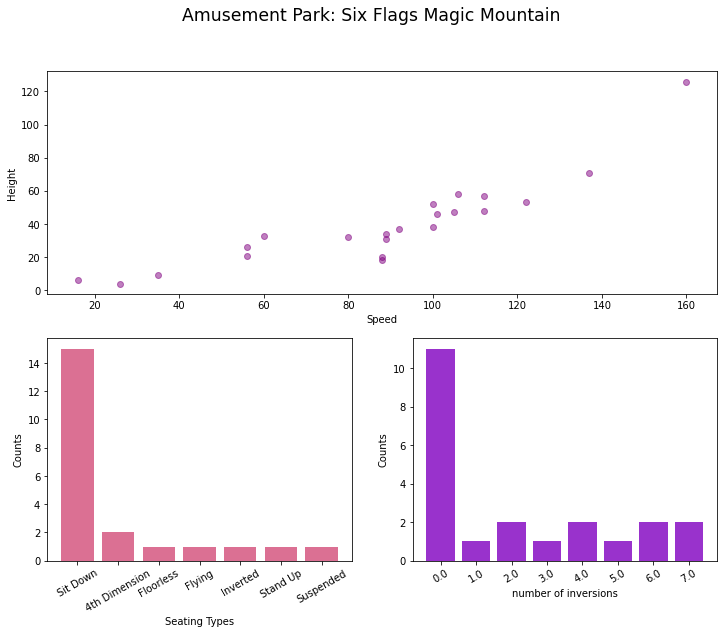

In [561]:
park_specialties(roller_coasters_cleaned, 'Six Flags Magic Mountain')

<Figure size 432x288 with 0 Axes>

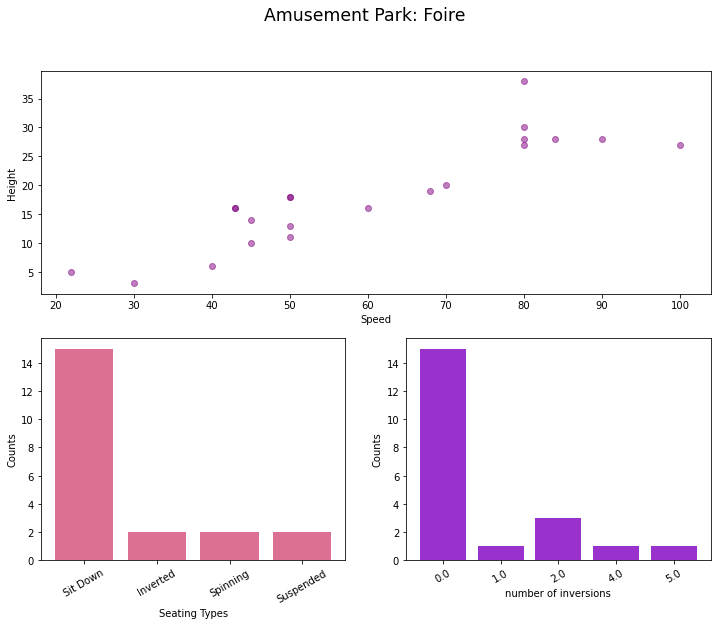

In [562]:
park_specialties(roller_coasters_cleaned, 'Foire')

Even so, <font color='green'>**'Six Flags Magic Mountain'**</font> and <font color='blue'>**'Foire'**</font> had almost the same number of roller coasters (22 and 21) in their parks. Six Flags Magic Mountain provided players more options. It had from short to high (just over 120 m) and from slow speed to high speed (160 kms/hr) coasters, 7 styles of seats, and number of inversion from none to 7.  Meanwhile, Foire had up to only around 40 m high and 100 kms/hr speed. It has 4 styles of seats and the maximum number of inversions was 5.

#  Summary:
## Golden Ticket Awarded Roller Coasters during 2013-2018
* Top 5 rankings of wood roller coasters 

    - **El Toro** was one of the front runners over the period. However, **Phoenix** had gotten better ranks and become its important competitor during 2016-2018. In contrast, **Boulder Dash** which had won over El Toro and Phoenix for 4 years in a row since 2013, did unwell in 2017-2018. These are interesting to investigate more about why *Boulder Dash* had worse performance than before or why *Phoenix* could do better. <br>

* Top 5 rankings of steel roller coasters <br>

    - There were many roller coasters that were in top 5 during these years but it was clear that **Millennium Force** and **Fury 325** were ones of the front runners. Both of them were the first runner-up and the winner in 2016-2018 in turn. However, **Steel Vengeance** might be a dark horse since it was just completely constructed in 2018 and ranked the second runner-up in the same year.

## Roller Coasters Insights
The speed, height, length of roller coasters had right-skewed distributions as there were outliers. The interquartile range (50% of samples) of each feature of roller coasters were as follows:
- *speed* was between 50 - 80 kilometres/hour
- *height* was between 15 - 36 metres
- *length* was between 360 - 881 metres.
- *number of inversions* was between 0 - 2

### Other Findings

- Speed and height of roller coasters have linear relationship. The highter a roller coasters is, the faster the speed is.
- The majorities of roller coasters had no inversion.
- The seating type - "Sit Down" - dominated all the seating types. The 'Inverted' and 'Spinning' seating types were the second and the third common.
* Seating types vs "Height, Speed, and Length"
    - The roller coasters which had "Sit Down" seating type had wide ranges of height, speed, and length of themselves.
    - 'Suspended', 'Spinning', and 'Motorbike' seating-typed coasters are quite short in height at around 20 metres.
    - Most of 'Floorless' and 'Wing' seating-typed roller coasters are quite high at about 40-55 metres. They were also good at speed (100 kms/hr). 
    - In aspect of length, 'Spinning' , '4th Dimension', and 'Pipeline' seating typed coasters were very short in length. These are reasonable because their shape or technique to make players scream are different from the others.
* Manufacturer's Specialties
    - Four manufacturers that had constructed the most number of roller coasters were Vekoma, Intamin, B&M, and Zierer.
    - **Vekoma** has manufactured a lot of roller coasters (217 roller coasters). However, the company usually constructs roller coasters up to just over 60 metres high and around 110 kms/hr speed. The common seating types were 'Sit Down' and 'Inverted' respectively. The most number of inversion were 0, 3, and 5.
    - 112 **Intamin**'s coasters were in range of 140 metres high and 240 kms/hr speed. They had speciaties in various of numbers of inversion from 0 to 10
    - 107 **B&M**'s coasters were in range of 100 metres high and 160 kms/hr speed. Most of seating types were Inverted, sit down and floorless. Moreover, they focused on more numbers of inversion like 5 inversions.
    - 88 **Zierer**'s coasters were in range of 35 metres high and 90 kms/hr speed. Zierer only constructed sit down coasters and almost all had no inversion.
* Park's Specialties
    - Two parks that had the most number of roller coasters were Six Flags Magic Mountain and Foire. 
    - Six Flags Magic Mountain provided players more options than Foire. It had from short to high (just over 120 m) and from slow speed to high speed (160 kms/hr) coasters, 7 styles of seats, and number of inversion from none to 7.  Meanwhile, Foire had up to only around 40 m high and 100 kms/hr speed. It has 4 styles of seats and the maximum number of inversions was 5.

<br>**Notice:**
This dataset had not been cleaned enough and had some errors that should be managed.
- There are the same coaster names but were written differently, for example, "Superman The Ride" and "Superman: The Ride". Therefore, they were recognized as different roller coasters when ploting top 5 steel roller coasters over time.
